<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/Airline_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mlxtend
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import eli5
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/airline_passenger_satisfaction.csv')

In [5]:
df. head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [6]:
df.shape

(129880, 24)

In [7]:
df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [8]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [9]:
# filling missing value using fillna() 
df.fillna(0)

,ID,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,...,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,In-flight_Wifi_Service,In-flight_Entertainment,Baggage_Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [10]:

df = df.drop('ID', axis=1)

In [11]:
# Imputing missing value with mean - Train and Test
df['Arrival_Delay'] = df['Arrival_Delay'].fillna(df['Arrival_Delay'].mean())

In [12]:
df.columns

Index(['Gender', 'Age', 'Customer_Type', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Departure_Delay', 'Arrival_Delay',
       'Departure_and_Arrival_Time_Convenience', 'Ease_of_Online_Booking',
       'Check-in_Service', 'Online_Boarding', 'Gate_Location',
       'On-board_Service', 'Seat_Comfort', 'Leg_Room_Service', 'Cleanliness',
       'Food_and_Drink', 'In-flight_Service', 'In-flight_Wifi_Service',
       'In-flight_Entertainment', 'Baggage_Handling', 'Satisfaction'],
      dtype='object')

In [13]:
a = df.groupby(['Satisfaction'])['Satisfaction'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df) * 100
a

,Satisfaction,Total,Percent(%)
0,Neutral or Dissatisfied,73452,56.553742
1,Satisfied,56428,43.446258


ITS SEEN HERE THAT 43.4% OF CUSTOMERS ARE SATISFIED WHILE 56.6% ARE NEUTRAL OR DISATISFIED

In [14]:
a = df.groupby(['Satisfaction'])['Satisfaction'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df) * 100
a

,Satisfaction,Total,Percent(%)
0,Neutral or Dissatisfied,73452,56.553742
1,Satisfied,56428,43.446258


Text(0.5, 1.0, 'SATISFACTION BY CUSTOMER TYPE AND TRAVEL TYPE')

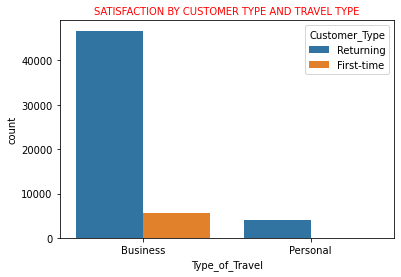

In [15]:
sns.countplot(data=df.loc[df['Satisfaction'] =='Satisfied'], x ='Type_of_Travel', hue ='Customer_Type')
plt.title('SATISFACTION BY CUSTOMER TYPE AND TRAVEL TYPE', color='r', fontsize='medium')

In [16]:
a = df.groupby(['Type_of_Travel', 'Customer_Type'])['Satisfaction'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df) * 100
a

,Type_of_Travel,Customer_Type,Total,Percent(%)
0,Business,First-time,23579,18.154450
1,Business,Returning,66114,50.903911
2,Personal,First-time,201,0.154758
3,Personal,Returning,39986,30.786880


In [17]:
a = df.groupby(['Satisfaction', 'Type_of_Travel', 'Customer_Type', 'Gender'])['Satisfaction'].count().reset_index(name='Total')
a['Percent(%)'] = a.Total/len(df) * 100
a

,Satisfaction,Type_of_Travel,Customer_Type,Gender,Total,Percent(%)
0,Neutral or Dissatisfied,Business,First-time,Female,9809,7.552356
1,Neutral or Dissatisfied,Business,First-time,Male,8102,6.238066
2,Neutral or Dissatisfied,Business,Returning,Female,9762,7.516169
3,Neutral or Dissatisfied,Business,Returning,Male,9664,7.440715
4,Neutral or Dissatisfied,Personal,First-time,Female,84,0.064675
5,Neutral or Dissatisfied,Personal,First-time,Male,85,0.065445
6,Neutral or Dissatisfied,Personal,Returning,Female,17975,13.839698
7,Neutral or Dissatisfied,Personal,Returning,Male,17971,13.836618
8,Satisfied,Business,First-time,Female,2935,2.259778
9,Satisfied,Business,First-time,Male,2733,2.104250


In [18]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [19]:
df['Satisfaction'].replace({'neutral or dissatisfied': 1, 'satisfied': 0},inplace = True)

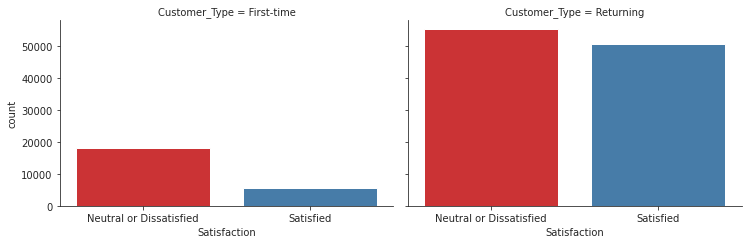

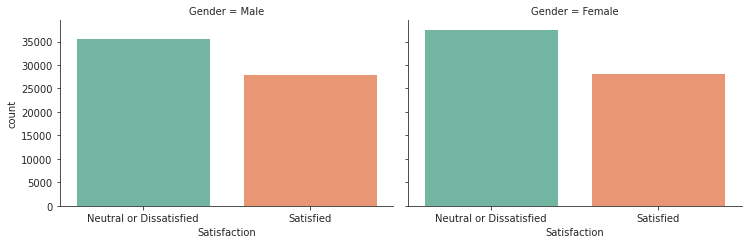

In [20]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot("Satisfaction", col="Customer_Type", col_wrap=2, data=df, kind="count", height=3.5, aspect=1.5, palette = 'Set1')

    g = sns.catplot("Satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=3.5, aspect=1.5, palette= 'Set2')

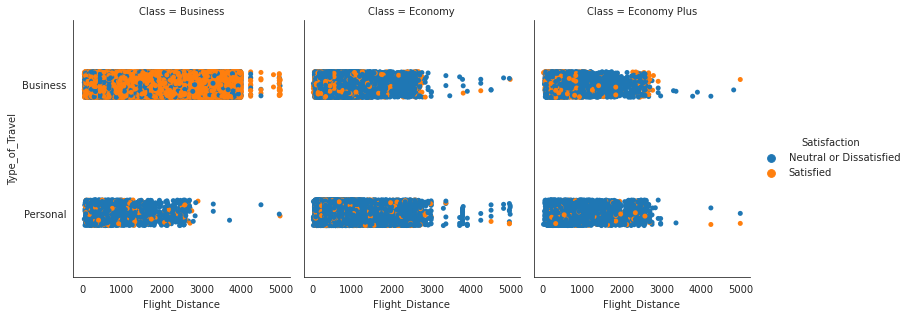

In [21]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="Satisfaction", col="Class", data=df, height=4.5, aspect=.8)


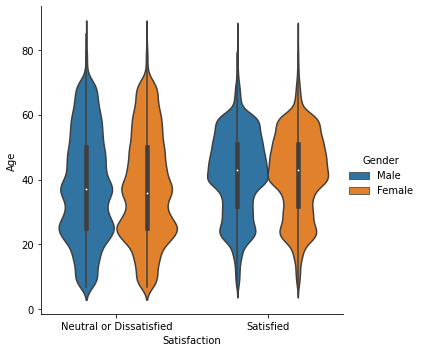

In [22]:
sns.catplot(y = "Age", data=df, x ='Satisfaction', hue = 'Gender', kind = 'violin')

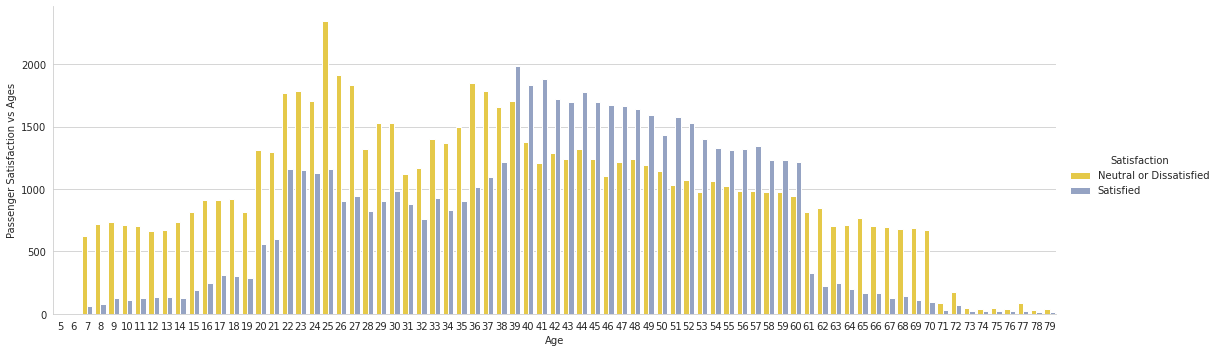

In [23]:

with sns.axes_style('whitegrid'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='Satisfaction', palette = 'Set2_r', order=range(5, 80))
    g.set_ylabels('Passenger Satisfaction vs Ages')

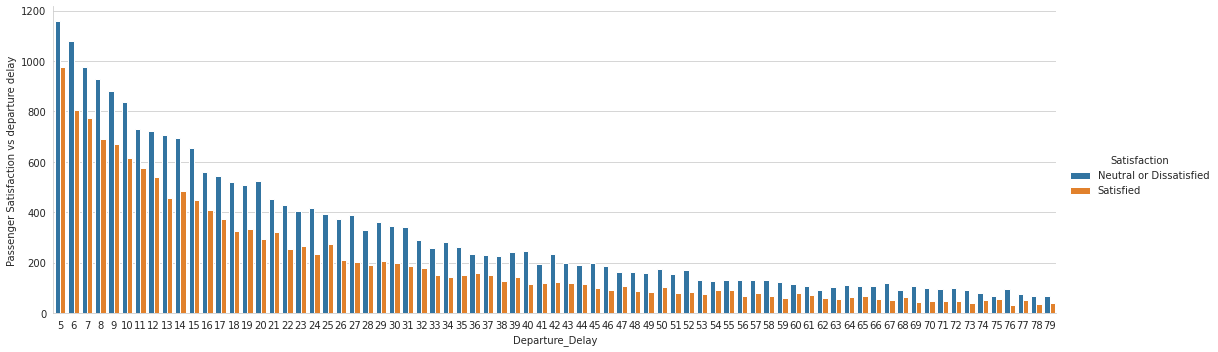

In [24]:
with sns.axes_style('whitegrid'):
    g = sns.catplot("Departure_Delay", data=df, aspect=3.0, kind='count', hue='Satisfaction', order=range(5, 80))
    g.set_ylabels('Passenger Satisfaction vs departure delay')

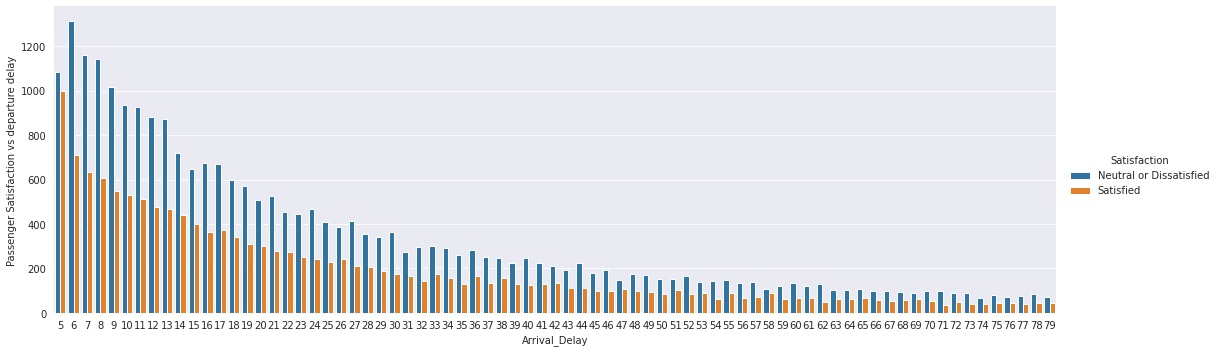

In [25]:
with sns.axes_style('darkgrid'):
    g = sns.catplot('Arrival_Delay', data=df, aspect=3.0, kind='count', hue='Satisfaction', order=range(5, 80))
    g.set_ylabels('Passenger Satisfaction vs departure delay')

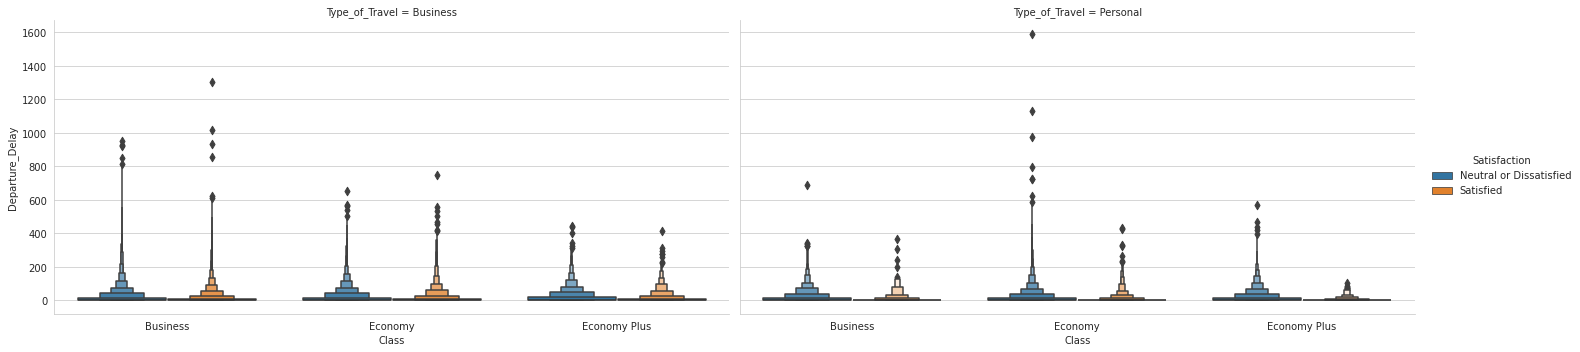

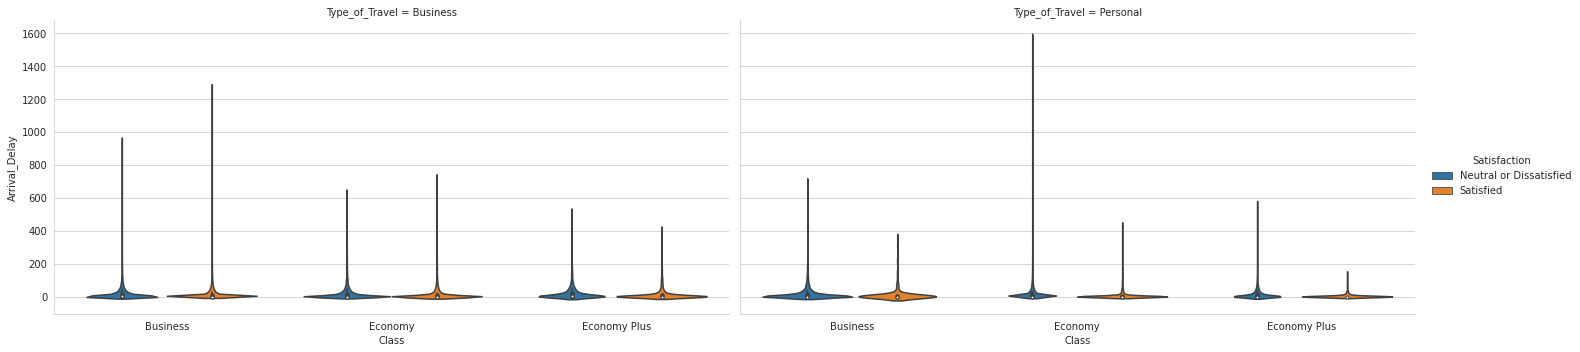

In [26]:

with sns.axes_style('whitegrid'):
    g = sns.catplot(data=df, x="Class", y="Departure_Delay", hue="Satisfaction", col="Type_of_Travel",  kind="boxen", height=5, aspect=2)
    g = sns.catplot(data=df, x="Class", y="Arrival_Delay", hue="Satisfaction", col="Type_of_Travel", kind="violin", height=5, aspect=2)

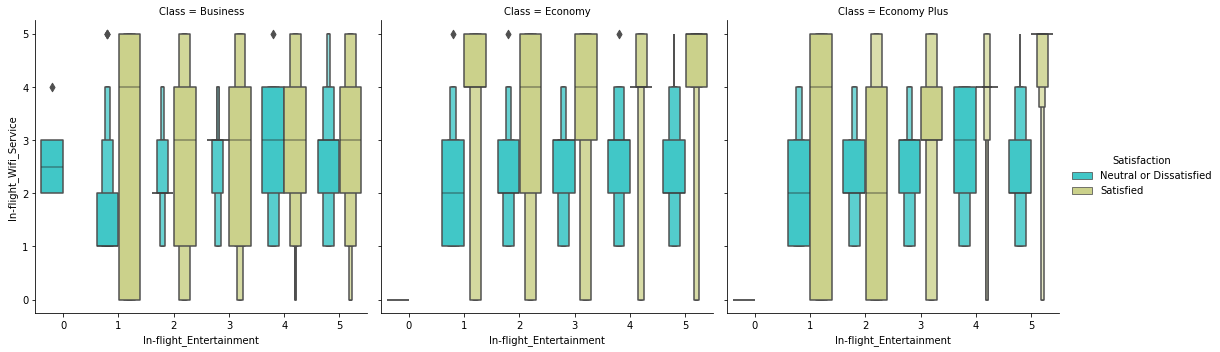

In [27]:
sns.catplot(data=df, x='In-flight_Entertainment', y='In-flight_Wifi_Service', hue="Satisfaction", col="Class", palette = 'rainbow',  kind="boxen")


In [28]:
df.columns

Index(['Gender', 'Age', 'Customer_Type', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Departure_Delay', 'Arrival_Delay',
       'Departure_and_Arrival_Time_Convenience', 'Ease_of_Online_Booking',
       'Check-in_Service', 'Online_Boarding', 'Gate_Location',
       'On-board_Service', 'Seat_Comfort', 'Leg_Room_Service', 'Cleanliness',
       'Food_and_Drink', 'In-flight_Service', 'In-flight_Wifi_Service',
       'In-flight_Entertainment', 'Baggage_Handling', 'Satisfaction'],
      dtype='object')

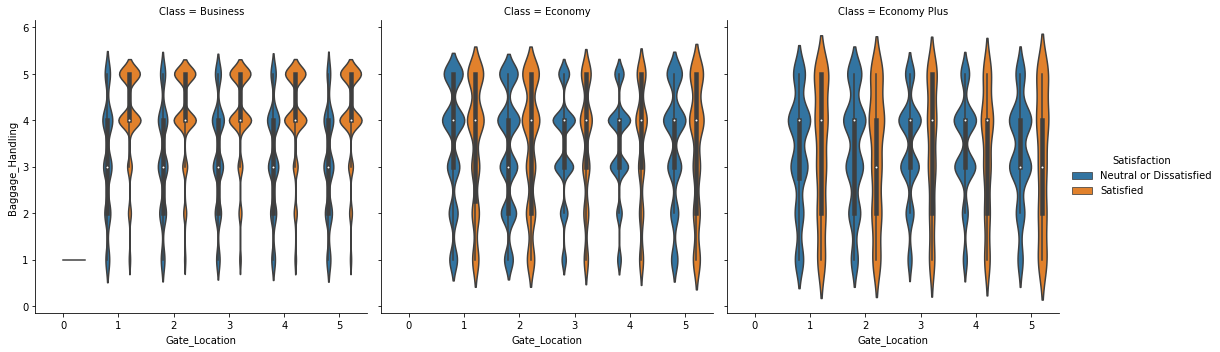

In [29]:
sns.catplot( data=df, x="Gate_Location", y="Baggage_Handling", hue="Satisfaction", col="Class", kind="violin")


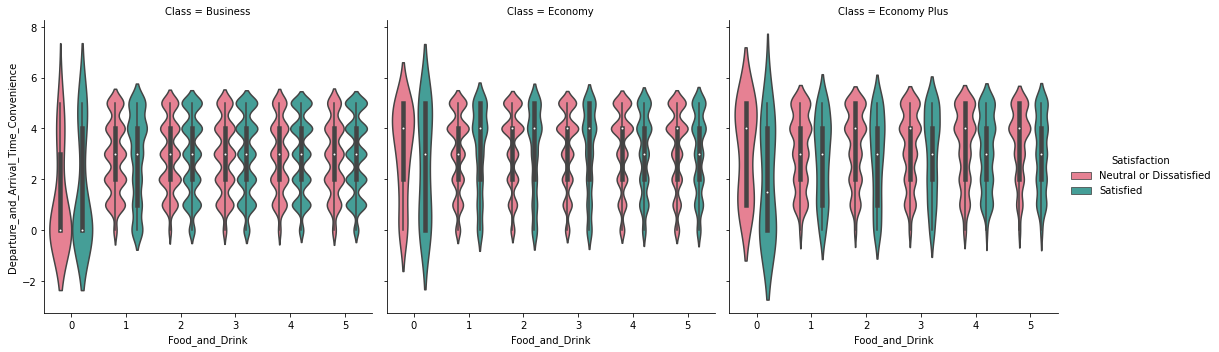

In [30]:
sns.catplot(x="Food_and_Drink", y="Departure_and_Arrival_Time_Convenience", hue = 'Satisfaction', col = 'Class', kind = 'violin', data=df, palette= 'husl')

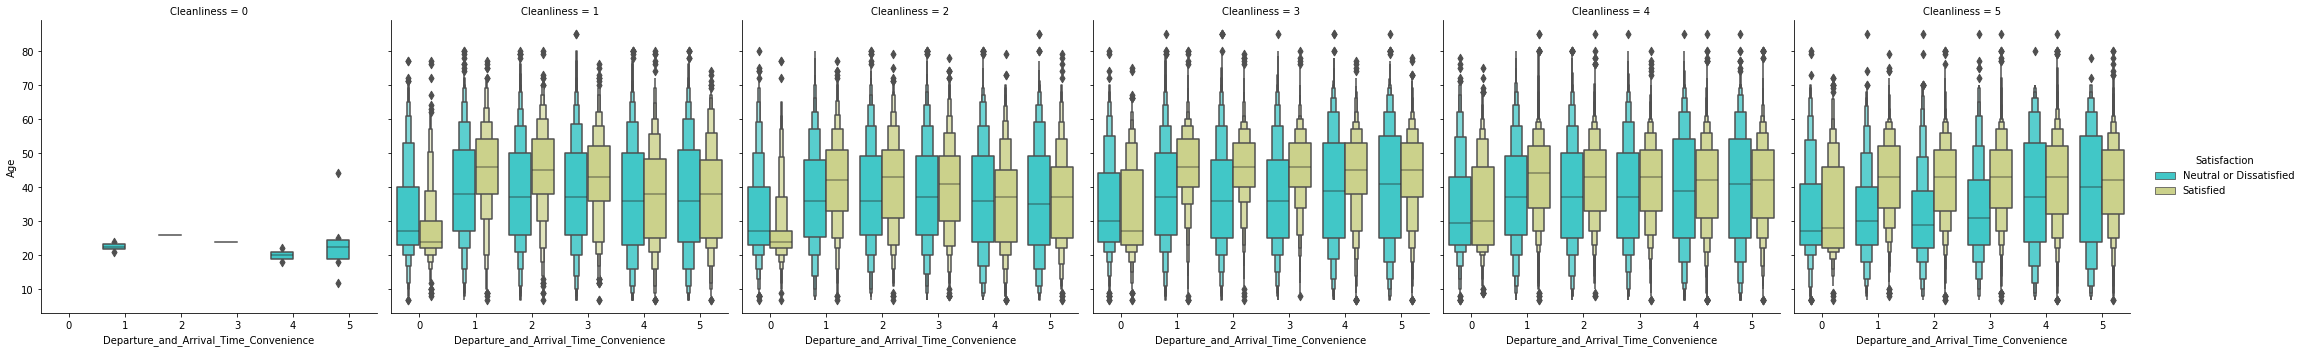

In [38]:

sns.catplot( y = 'Age', x = 'Departure_and_Arrival_Time_Convenience', hue = "Satisfaction", col="Cleanliness", palette = 'rainbow', kind="boxen", data=df)

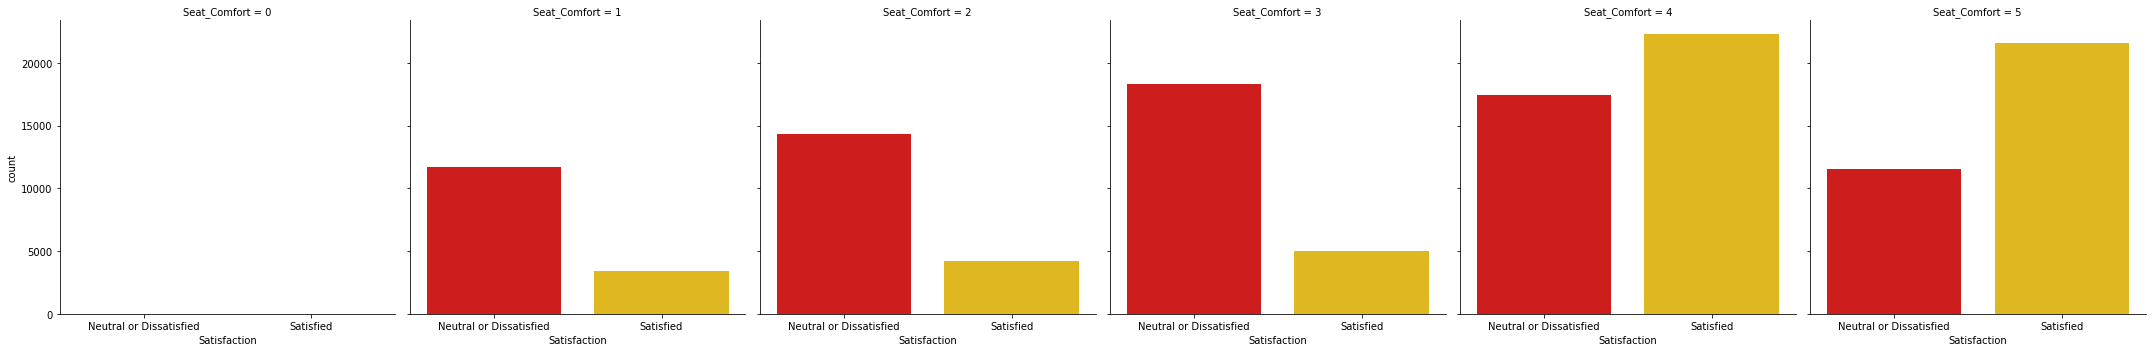

In [43]:
sns.catplot( "Satisfaction", col="Seat_Comfort", data=df, palette = 'hot', kind="count")


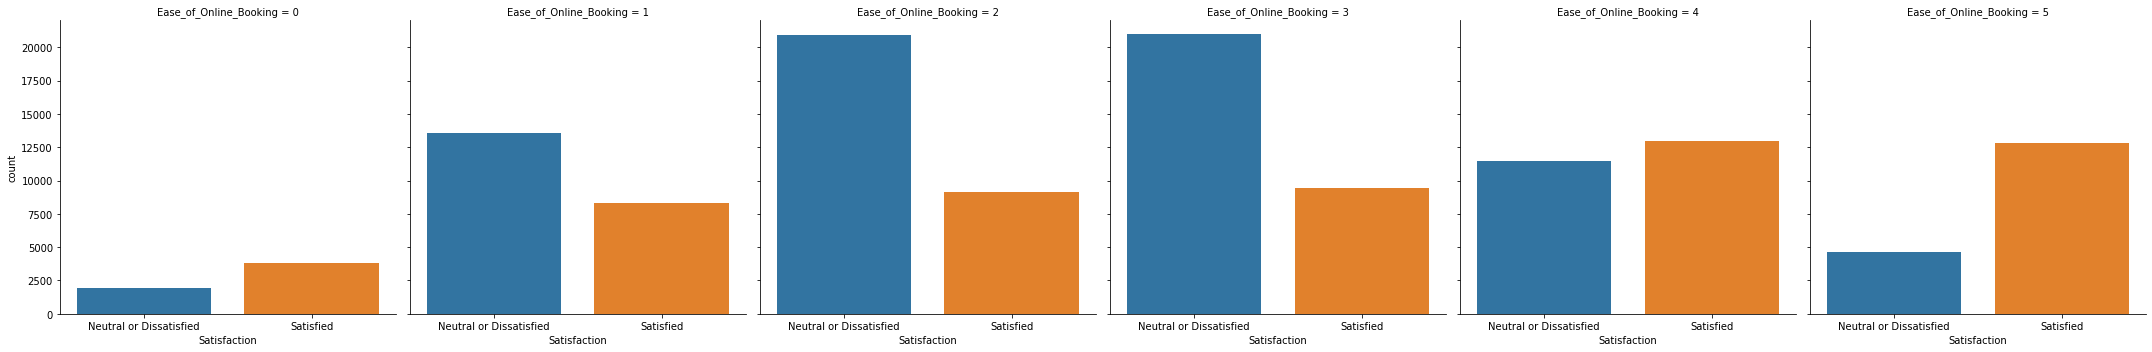

In [40]:
sns.catplot("Satisfaction", col="Ease_of_Online_Booking", col_wrap=6, data=df, kind="box")

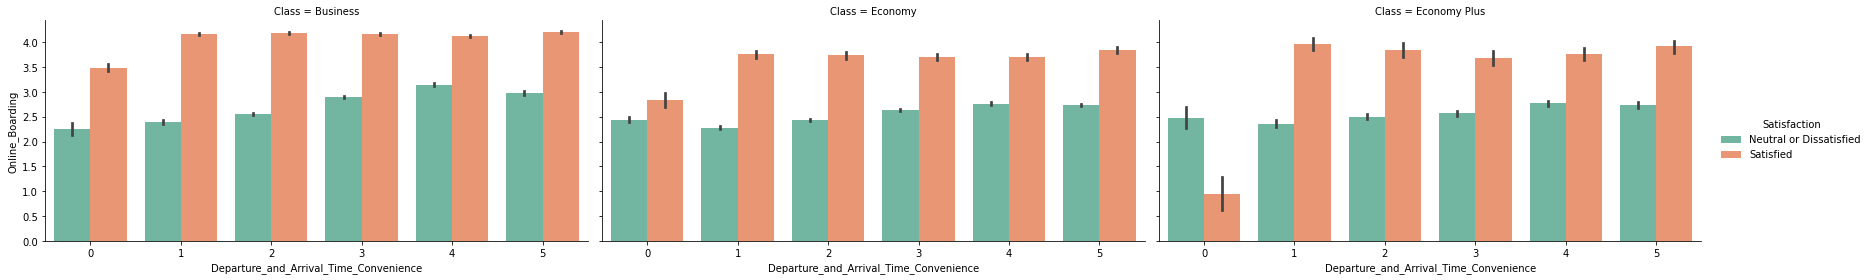

In [41]:
sns.catplot(data=df, x="Departure_and_Arrival_Time_Convenience", y="Online_Boarding", hue="Satisfaction", col="Class", palette = 'Set2', kind="bar", height=4, aspect=2)


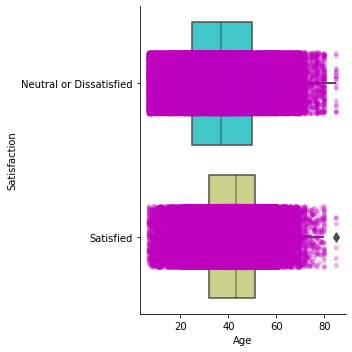

In [52]:
sns.catplot(x = 'Age', y = "Satisfaction", palette = 'rainbow', kind="boxen", data=df)

sns.stripplot(x='Age', y='Satisfaction', data=df, alpha=0.3, jitter=0.2, color='m');